# Sample NLCD

In [22]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.transform import xy
import pyproj 

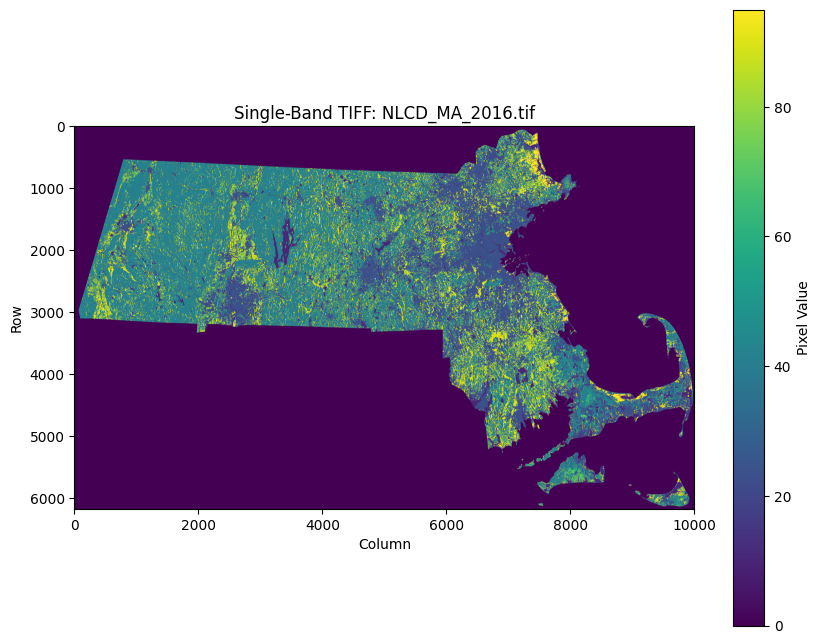

In [4]:
def load_and_plot_tif(file_path):
    """
    Loads a single-band TIFF file and plots its content.

    Args:
        file_path (str): The path to the TIFF file.
    """
    try:
        # Open the TIFF file in read mode
        with rasterio.open(file_path) as src:
            # Read the first band (assuming it's a single-band image)
            # If you know the band number, you can specify it, e.g., src.read(1)
            image_data = src.read(1)

            # Get metadata for plotting (e.g., coordinate system, transform)
            # You might use this for more advanced plotting, but for a basic plot,
            # just the image_data is sufficient.
            # transform = src.transform
            # crs = src.crs

            # Plot the image data
            plt.figure(figsize=(10, 8))
            plt.imshow(image_data) # 'gray' colormap is good for single-band data
            plt.colorbar(label='Pixel Value')
            plt.title(f'Single-Band TIFF: {file_path.split("/")[-1]}')
            plt.xlabel('Column')
            plt.ylabel('Row')
            plt.grid(False) # Turn off grid lines
            plt.show()

    except rasterio.errors.RasterioIOError as e:
        print(f"Error loading the TIFF file: {e}")
        print("Please ensure the file path is correct and the file is a valid TIFF.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage:
# Replace 'your_single_band_file.tif' with the actual path to your TIFF file
# load_and_plot_tif('your_single_band_file.tif')

# For demonstration, you might create a dummy file or use a known one.
# If you have a file named 'example.tif' in your current directory:
load_and_plot_tif('data/raw/NLCD_MA_2016.tif')

In [6]:
def extract_non_overlapping_squares(file_path, square_size=360):
    """
    Loads a single-band TIFF file and extracts non-overlapping square blocks of pixels.

    Args:
        file_path (str): The path to the single-band TIFF file.
        square_size (int): The size of the square (e.g., 360 for 360x360 pixels).

    Returns:
        list: A list of NumPy arrays, where each array is a square block of pixels.
              Returns an empty list if no blocks can be extracted or on error.
    """
    extracted_blocks = []

    try:
        with rasterio.open(file_path) as src:
            # Ensure it's a single-band image
            if src.count != 1:
                print(f"Warning: The TIFF file has {src.count} bands. Reading only the first band.")
            
            image_data = src.read(1) # Read the single band
            rows, cols = image_data.shape

            print(f"Image dimensions: {rows} rows, {cols} columns")
            print(f"Desired square size: {square_size}x{square_size}")

            # Calculate how many full squares fit in the image
            num_rows_of_squares = rows // square_size
            num_cols_of_squares = cols // square_size

            print(f"Number of full squares vertically: {num_rows_of_squares}")
            print(f"Number of full squares horizontally: {num_cols_of_squares}")

            if num_rows_of_squares == 0 or num_cols_of_squares == 0:
                print("No full squares of the specified size can be extracted from the image.")
                return []

            for i in range(num_rows_of_squares):
                for j in range(num_cols_of_squares):
                    # Define the slicing indices for the current square
                    row_start = i * square_size
                    row_end = row_start + square_size
                    col_start = j * square_size
                    col_end = col_start + square_size

                    # Extract the square block
                    block = image_data[row_start:row_end, col_start:col_end]
                    extracted_blocks.append(block)
        
        print(f"Successfully extracted {len(extracted_blocks)} non-overlapping {square_size}x{square_size} pixel blocks.")
        return extracted_blocks

    except rasterio.errors.RasterioIOError as e:
        print(f"Error loading the TIFF file: {e}")
        print("Please ensure the file path is correct and the file is a valid TIFF.")
        return []
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return []

In [7]:
# Example Usage:
# Create a dummy TIFF file for demonstration purposes
# In a real scenario, you would replace 'dummy_single_band.tif' with your actual file.
try:
    # Dimensions for the dummy file
    # dummy_rows, dummy_cols = 6169, 10004
    # dummy_data = np.random.randint(0, 256, size=(dummy_rows, dummy_cols), dtype=np.uint8)
# 
    # # Define metadata for the TIFF file
    # profile = {
    #     'driver': 'GTiff',
    #     'height': dummy_rows,
    #     'width': dummy_cols,
    #     'count': 1,  # Single band
    #     'dtype': dummy_data.dtype,
    #     'crs': 'EPSG:4326', # WGS 84 geographic coordinate system (example)
    #     'transform': rasterio.transform.from_origin(0, dummy_rows, 1, 1), # Example transform
    # }
# 
    # with rasterio.open('dummy_single_band.tif', 'w', **profile) as dst:
    #     dst.write(dummy_data, 1) # Write the dummy data to band 1
# 
    # print("Dummy 'dummy_single_band.tif' created successfully for demonstration.")

    # Now, run the extraction function with the dummy file
    square_blocks = extract_non_overlapping_squares('data/raw/NLCD_MA_2016.tif', square_size=360)

    # You can now work with the extracted_blocks list
    if square_blocks:
        print(f"\nFirst extracted block (shape): {square_blocks[0].shape}")
        # You can process each block further, e.g., plot them, save them, etc.
        # For example, to plot the first block:
        # import matplotlib.pyplot as plt
        # plt.imshow(square_blocks[0], cmap='gray')
        # plt.title('First Extracted 360x360 Block')
        # plt.show()

except ImportError:
    print("Please install 'rasterio' and 'numpy' to run this code.")
    print("You can install them using: pip install rasterio numpy")
except Exception as e:
    print(f"An error occurred during dummy file creation or extraction: {e}")

Image dimensions: 6169 rows, 10004 columns
Desired square size: 360x360
Number of full squares vertically: 17
Number of full squares horizontally: 27
Successfully extracted 459 non-overlapping 360x360 pixel blocks.

First extracted block (shape): (360, 360)


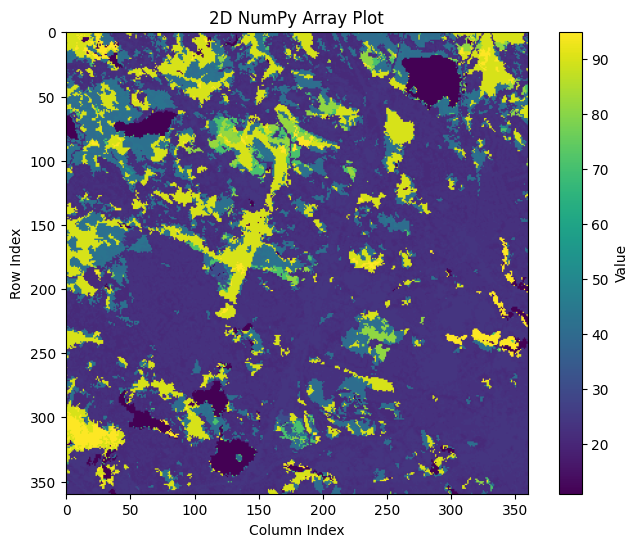

In [12]:
def plot_2d_array(array_data, title="2D NumPy Array Plot", cmap='viridis'):
    """
    Plots a 2D NumPy array as an image.

    Args:
        array_data (np.ndarray): The 2D NumPy array to plot.
        title (str): The title of the plot.
        cmap (str): The colormap to use (e.g., 'viridis', 'gray', 'plasma').
    """
    if array_data.ndim != 2:
        print("Error: Input array must be 2-dimensional for this plotting function.")
        return

    plt.figure(figsize=(8, 6))
    plt.imshow(array_data, cmap=cmap)
    plt.colorbar(label='Value')
    plt.title(title)
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()
plot_2d_array(square_blocks[100])

In [13]:

def filter_arrays_by_zero_percentage(list_of_arrays, zero_threshold_percentage=5):
    """
    Filters a list of NumPy arrays, removing arrays that have more than
    a specified percentage of pixels equal to 0.

    Args:
        list_of_arrays (list): A list where each element is a NumPy array.
        zero_threshold_percentage (float): The maximum allowed percentage of
                                           zero pixels (e.g., 10 for 10%).

    Returns:
        list: A new list containing only the arrays that meet the criteria.
    """
    filtered_arrays = []
    
    # Calculate the total number of pixels in each array (assuming consistent shape)
    # Get shape from the first array, assuming all arrays have the same shape
    if not list_of_arrays:
        print("Input list of arrays is empty. Returning empty list.")
        return []
        
    # Get the shape from the first array to calculate total pixels
    # We are expecting 360x360 arrays
    expected_rows, expected_cols = list_of_arrays[0].shape 
    total_pixels_in_array = expected_rows * expected_cols

    # Calculate the maximum allowed number of zero pixels
    max_allowed_zeros = (zero_threshold_percentage / 100.0) * total_pixels_in_array
    
    print(f"Total pixels in each array: {total_pixels_in_array}")
    print(f"Maximum allowed zero pixels ({zero_threshold_percentage}%): {max_allowed_zeros}")

    for i, arr in enumerate(list_of_arrays):
        if arr.shape != (expected_rows, expected_cols):
            print(f"Warning: Array at index {i} has unexpected shape {arr.shape}. Skipping.")
            continue

        # Count the number of pixels equal to 0
        num_zeros = np.sum(arr == 0) # This is efficient for NumPy arrays

        if num_zeros <= max_allowed_zeros:
            filtered_arrays.append(arr)
        # else:
            # print(f"Array at index {i} removed: {num_zeros} zeros ({num_zeros / total_pixels_in_array * 100:.2f}%)")

    print(f"Original number of arrays: {len(list_of_arrays)}")
    print(f"Number of arrays after filtering: {len(filtered_arrays)}")
    
    return filtered_arrays

filtered_sq_arrays = filter_arrays_by_zero_percentage(square_blocks)

Total pixels in each array: 129600
Maximum allowed zero pixels (5%): 6480.0
Original number of arrays: 459
Number of arrays after filtering: 142


In [23]:
# Get latitude and longitude of pixels

def get_pixel_lat_lon(file_path):
    """
    Reads a TIFF file and returns the latitude and longitude for each pixel.

    Args:
        file_path (str): The path to the TIFF file.

    Returns:
        tuple: A tuple containing two NumPy arrays:
               - latitudes (np.ndarray): 2D array of latitudes for each pixel.
               - longitudes (np.ndarray): 2D array of longitudes for each pixel.
               Returns (None, None) if an error occurs.
    """
    try:
        with rasterio.open(file_path) as src:
            rows, cols = src.shape # Get dimensions (height, width)
            transform = src.transform # Get the affine transform
            crs = src.crs # Get the Coordinate Reference System

            print(f"Image dimensions: {rows} rows, {cols} columns")
            print(f"Original CRS: {crs}")
            print(f"Affine Transform:\n{transform}")

            # Create arrays of pixel indices (row, col)
            # np.meshgrid creates 2D arrays for rows and columns
            # The indices start from 0.5 to get the center of the pixel.
            col_indices, row_indices = np.meshgrid(
                np.arange(cols) + 0.5,
                np.arange(rows) + 0.5
            )

            # Convert pixel coordinates (row, col) to world coordinates (x, y)
            # rasterio.transform.xy takes (row, col) and the transform, returning (x, y)
            # It can handle broadcasting for entire arrays.
            xs, ys = xy(row_indices, col_indices, transform=transform)

            # Initialize latitude and longitude arrays
            latitudes = np.zeros_like(xs)
            longitudes = np.zeros_like(ys)

            # Check if the CRS is already geographic (e.g., WGS84 - EPSG:4326)
            if crs.is_geographic:
                print("CRS is geographic. Directly assigning x/y to longitude/latitude.")
                longitudes = xs
                latitudes = ys
            else:
                # If CRS is projected, convert to geographic coordinates (latitude, longitude)
                print(f"CRS is projected ({crs}). Converting to geographic coordinates (EPSG:4326).")
                
                # Create a transformer from the source CRS to WGS84 (EPSG:4326)
                transformer = pyproj.Transformer.from_crs(
                    src_crs=crs,
                    dst_crs="EPSG:4326",
                    always_xy=True # This ensures x is always longitude, y is always latitude
                ).transform
                
                # Apply the transformation
                longitudes, latitudes = transformer(xs, ys)

            return latitudes, longitudes

    except rasterio.errors.RasterioIOError as e:
        print(f"Error loading the TIFF file: {e}")
        print("Please ensure the file path is correct and the file is a valid TIFF.")
        return None, None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None, None



In [26]:
# lats, longs = get_pixel_lat_lon('data/raw/NLCD_MA_2016.tif')
with rasterio.open("data/raw/NLCD_MA_2016.tif") as src:
            rows, cols = src.shape # Get dimensions (height, width)
            transform = src.transform # Get the affine transform
            crs = src.crs # Get the Coordinate Reference System

            print(f"Image dimensions: {rows} rows, {cols} columns")
            print(f"Original CRS: {crs}")
            print(f"Affine Transform:\n{transform}")

            # Create arrays of pixel indices (row, col)
            # np.meshgrid creates 2D arrays for rows and columns
            # The indices start from 0.5 to get the center of the pixel.
            col_indices, row_indices = np.meshgrid(
                np.arange(cols) + 0.5,
                np.arange(rows) + 0.5
            )

            # Convert pixel coordinates (row, col) to world coordinates (x, y)
            # rasterio.transform.xy takes (row, col) and the transform, returning (x, y)
            # It can handle broadcasting for entire arrays.
            xs, ys = xy(row_indices, col_indices, transform=transform)

            # Initialize latitude and longitude arrays
            latitudes = np.zeros_like(xs)
            longitudes = np.zeros_like(ys)


Image dimensions: 6169 rows, 10004 columns
Original CRS: EPSG:2249
Affine Transform:
| 98.42, 0.00, 103838.37|
| 0.00,-98.42, 3154521.25|
| 0.00, 0.00, 1.00|


TypeError: xy() got multiple values for argument 'transform'